# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
#Cargamos libreria ggplot2
library(ggplot2)

In [2]:
#Obtenemos la informacion del csv
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [3]:
w <- weatherPraga[with(weatherPraga, order(-PRCP)),]
w <- w[1:10,c("DATE","PRCP")]
rownames(w)<-paste0("precipitacion",1:nrow(w))
w

,DATE,PRCP
precipitacion1,1939,745.5
precipitacion2,1828,665.4
precipitacion3,2002,661.5
precipitacion4,1946,638.3
precipitacion5,1890,637.3
precipitacion6,1837,634.9
precipitacion7,1958,633.1
precipitacion8,1831,625.7
precipitacion9,1966,624.1
precipitacion10,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [4]:
rl_temperatura_minima <- lm(data = weatherPraga, formula =  EMNT ~ DATE)
summary(rl_temperatura_minima)


Call:
lm(formula = EMNT ~ DATE, data = weatherPraga)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -48.00664    9.17007  -5.235 3.74e-07 ***
DATE          0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


## Conclusiones

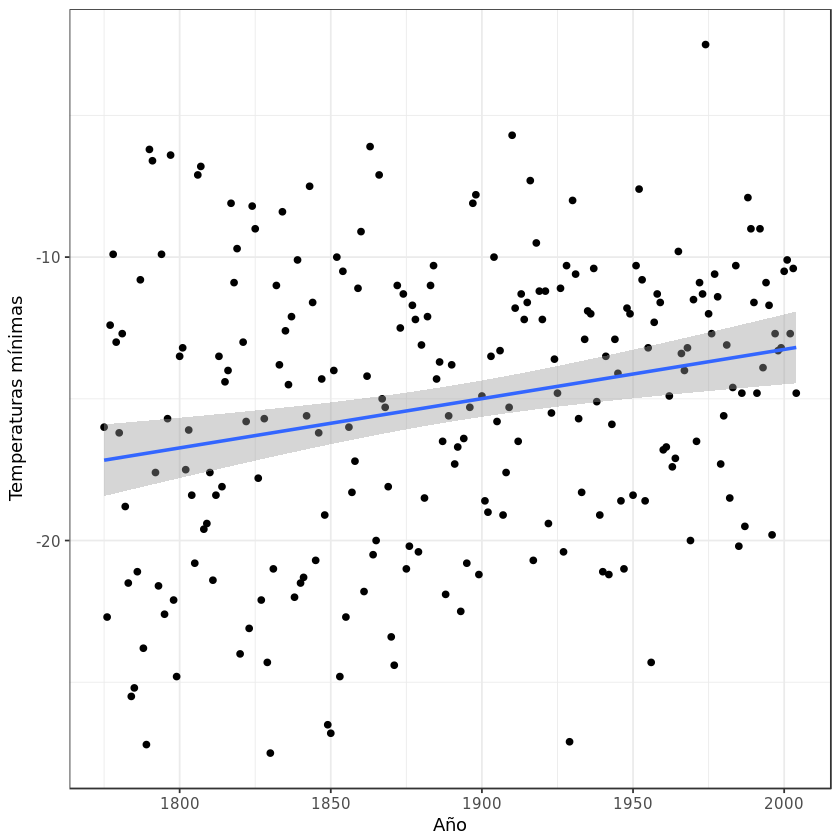

In [5]:
ggplot(weatherPraga, aes(x=DATE,y=EMNT)) + geom_point() + geom_smooth(method='lm') + theme_bw() + xlab("Año") + ylab("Temperaturas mínimas")

# Conclusiones
La temperatura media según la regresión lineal sube 0.01738 grados cada año (ver pendiente de la recta en la regresión lineal **rl_temperatura_minima** ).

¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [6]:
#creamos un df con el primer intervalo
df.grupo1 <- subset(weatherPraga, DATE>=1775 & DATE<=1794, select = c(DATE,EMNT))

In [7]:
#creamos un df con el segundo intervalo
df.grupo2 <- subset(weatherPraga, DATE>=1985 & DATE<=2004, select = c(DATE,EMNT))

In [8]:
#calculamos las medias de ambos grupos para tener una idea genérica de los grupos de datos
mean(df.grupo1$EMNT)
mean(df.grupo2$EMNT)

[1] -16.935

[1] -13.04

In [9]:
#realizamos el test de shapiro para comprobar si las distribuciones de las variables son gaussianas
shapiro.test(df.grupo1$EMNT)
shapiro.test(df.grupo2$EMNT)


	Shapiro-Wilk normality test

data:  df.grupo1$EMNT
W = 0.95089, p-value = 0.3808



	Shapiro-Wilk normality test

data:  df.grupo2$EMNT
W = 0.91373, p-value = 0.0751


Conclusión: Los resultados del test de shapiro nos muestran que podemos encontrarnos ante distribuciones gaussianas

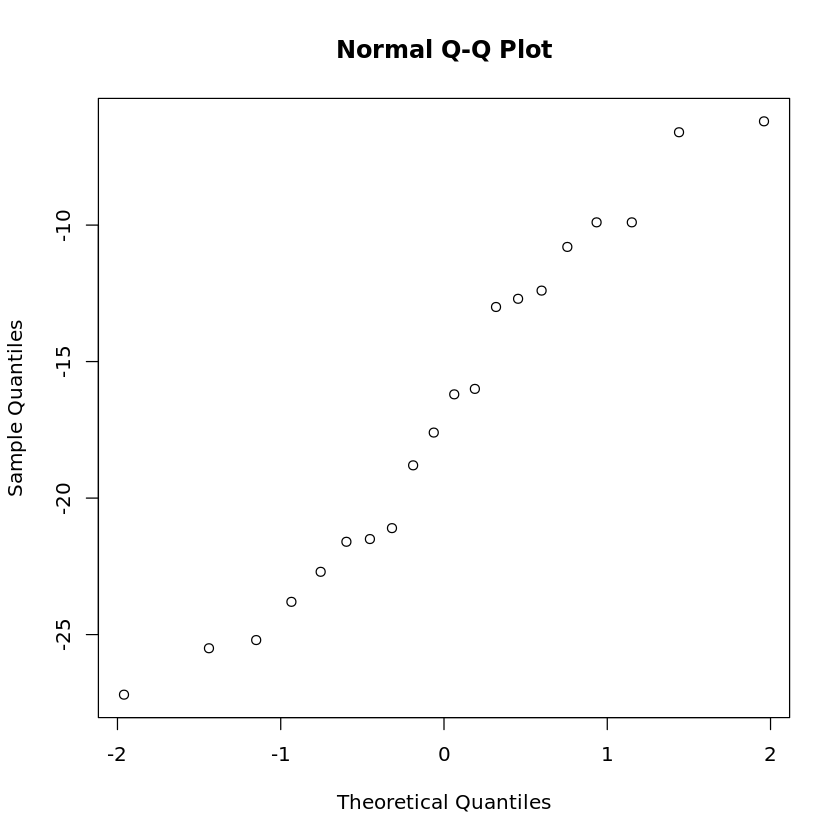

In [10]:
#vamos a calcular el qqplot de las variables para que nos proporcionen más información sobre si son gaussianas
qqnorm(df.grupo1$EMNT)

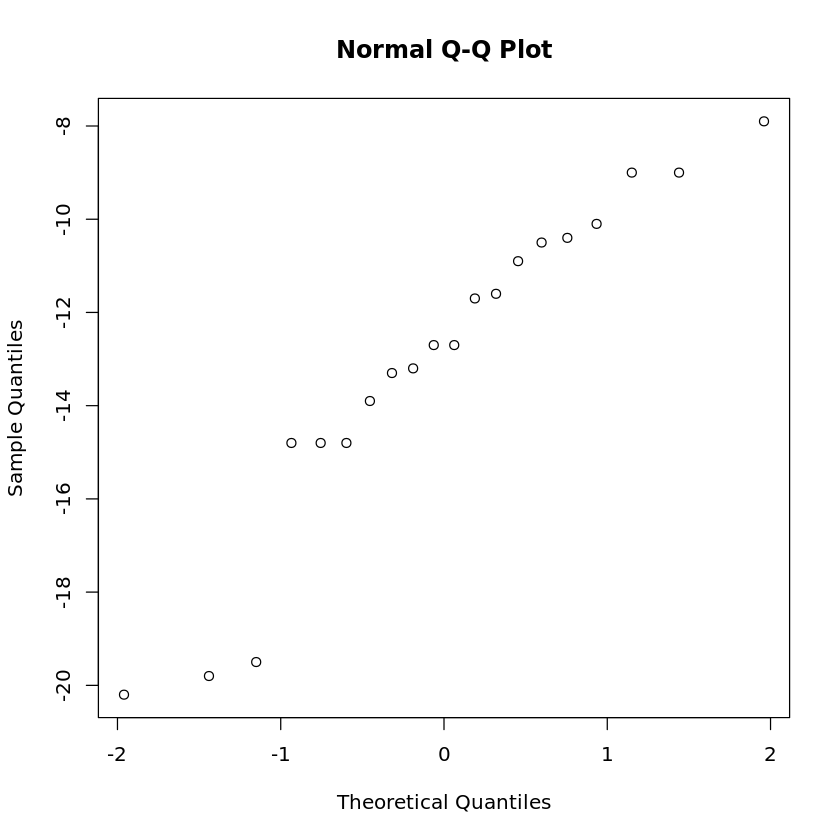

In [11]:
qqnorm(df.grupo2$EMNT)

Los gráficos qqplot nos indican que probablemente se trate de dos variables con distribución normal

In [12]:
#verificamos la varianza de los dos grupos
var.test(df.grupo1$EMNT,df.grupo2$EMNT)


	F test to compare two variances

data:  df.grupo1$EMNT and df.grupo2$EMNT
F = 3.3749, num df = 19, denom df = 19, p-value = 0.011
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.335826 8.526518
sample estimates:
ratio of variances 
          3.374899 


Tras realizar el test observamos que tienen diferente varianza por lo que tendremos que aplicar el test de Welch

In [13]:
#test de Welch
#para verificar de forma estadísticamente significativa la diferencia entre medias entre dos variables gaussianas realizamos t-test
t.test(df.grupo1$EMNT,df.grupo2$EMNT)


	Welch Two Sample t-test

data:  df.grupo1$EMNT and df.grupo2$EMNT
t = -2.3499, df = 29.351, p-value = 0.02571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2832043 -0.5067957
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


Una vez realizado el test bilateral donde podemos indicar que las medias son distintas (p-value < 0.05), pasamos a realizar el test unilateral donde observaremos que una es menor que la otra

In [14]:
#t-test unilateral
t.test(df.grupo1$EMNT,df.grupo2$EMNT, var.equal = TRUE, alternative = 'less')


	Two Sample t-test

data:  df.grupo1$EMNT and df.grupo2$EMNT
t = -2.3499, df = 38, p-value = 0.01204
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -1.100534
sample estimates:
mean of x mean of y 
  -16.935   -13.040 


Al obtener un p-value < 0.05 se vuelve a rechazar Ho, por lo que aceptamos H1 que nos indica que existe diferencia entre las medias de los dos grupos

#### Conclusiones

* La media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794] es: -16.935 grados
* La media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004] es: -13.040 grados
* La diferencia entre ambos es de: 3.895 grados

Para poder afirmar que la diferencia de las medias es estadísticamente significativo es necesario realizar un test estadístico. Debido a que se trata de dos valores cuantitativos y que puede que se trate de dos variables con distribución gaussiana intentamos realizar un t-test.

Se ha comprobado que se puede realizar el t-test:

* Las dos variables siguen una distribución normal (comprobado mediante test de Shapiro y qqplot)
* La varianza es distinta

Al realizar el test de Weich, obtenemos un p-value < 0.05 lo que nos permite afirmar con un margen de error inferior al 5% que los dos grupos que estamos estudiando tienen la diferencia de grados señalada.


## Datos banco mundial

Carga los datos del banco mundial

In [15]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


En esta práctica vamos a utilizar la librería dplyr para manipular dataframes y reshape para utilizar la función melt

In [17]:
#dir.create(file.path("/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2"),recursive = T)
#install.packages(c('dplyr'), lib="~/R/x86_64-pc-linux-gnu-library/3.2", repos='https://cran.rstudio.com/',verbose=F)
#install.packages(c('reshape'), lib="~/R/x86_64-pc-linux-gnu-library/3.2", repos='https://cran.rstudio.com/',verbose=F)
library("dplyr",lib.loc = "/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2")
library("reshape",lib.loc = "/home/vagrant/R/x86_64-pc-linux-gnu-library/3.2") 

¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [18]:
#se crea un df con la emisión de los paises en 1970 y luego se ordena de mayor a menor
emisiónCO2_1970 <- databank %>% select(Country.Code, Indicator.Code, Country.Name, '1970') %>% filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>% filter(Country.Code %in% realCountryData$Country.Code)
emisiónCO2_1970_orden <- emisiónCO2_1970[rev(order(emisiónCO2_1970$'1970', na.last = FALSE)),] 
head(emisiónCO2_1970_orden,1)
print(paste("País con más kilotoneladas de C02 equivalente :",emisiónCO2_1970_orden$Country.Code[1],"con",emisiónCO2_1970_orden$'1970'[1]))

,Country.Code,Indicator.Code,Country.Name,1970
204,USA,EN.ATM.GHGT.KT.CE,United States,5400504


[1] "País con más kilotoneladas de C02 equivalente : USA con 5400503.5"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [19]:
#se realiza lo mismo que en el apartado anterior pero para el año 2012
emisiónCO2_2012 <- databank %>% select(Country.Code, Indicator.Code, Country.Name ,'2012') %>% filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>% filter(Country.Code %in% realCountryData$Country.Code)
emisiónCO2_2012[,'2012']<-emisiónCO2_2012[,'2012']
emisiónCO2_2012_orden <- emisiónCO2_2012[rev(order(emisiónCO2_2012$'2012', na.last = FALSE)),]
emisiónCO2_2012_5 <- emisiónCO2_2012_orden[1:5,]
emisiónCO2_2012_5

,Country.Code,Indicator.Code,Country.Name,2012
37,CHN,EN.ATM.GHGT.KT.CE,China,12454711
204,USA,EN.ATM.GHGT.KT.CE,United States,6343841
90,IND,EN.ATM.GHGT.KT.CE,India,3002895
27,BRA,EN.ATM.GHGT.KT.CE,Brazil,2989418
166,RUS,EN.ATM.GHGT.KT.CE,Russian Federation,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [20]:
#obtenemos un df con las emisiones de China desde 2000 a 2012
emisiónCO2_china<- databank %>% select(Country.Code, Indicator.Code, num_range(200,0:9),num_range(20,00:12)) %>% filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>% filter(Country.Code == "CHN")

In [21]:
#calculo de la media del porcentaje
datos <- c(as.numeric(emisiónCO2_china[3:15]))

ratio <- datos
ratio[1] <- NA
for (i in 2:13){
    ratio[i] <- (datos[i])/(datos[i-1])
}

myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}



print(paste("Media del porcentaje:",(myGeometricMean(ratio, na.rm=TRUE) - 1)*100))

[1] "Media del porcentaje: 7.75545448926402"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [22]:
grupos <- databank %>% select(Country.Code, Indicator.Code, '1960','1990','2014') %>% filter(Indicator.Code == "EN.ATM.CO2E.PC") %>% filter(Country.Code %in% realCountryData$Country.Code)

er <- melt(grupos, id=c("Country.Code","Indicator.Code"),na.rm=TRUE)
names(er) <- c("Country.Code","Indicator.Code","variable","value")
head(er,5)


Country.Code,Indicator.Code,variable,value
AFG,EN.ATM.CO2E.PC,1960,0.0460599
AGO,EN.ATM.CO2E.PC,1960,0.0974716
ALB,EN.ATM.CO2E.PC,1960,1.2581949
ARE,EN.ATM.CO2E.PC,1960,0.1187577
ARG,EN.ATM.CO2E.PC,1960,2.3674730


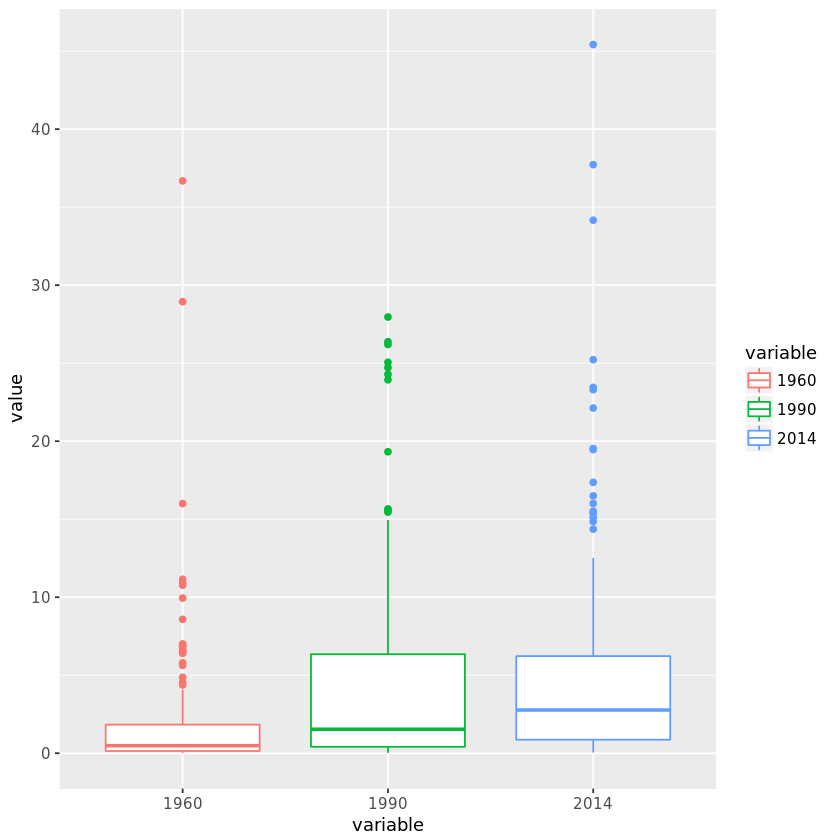

In [23]:
ggplot(er,aes(x=variable,y=value,color=variable))+ geom_boxplot()

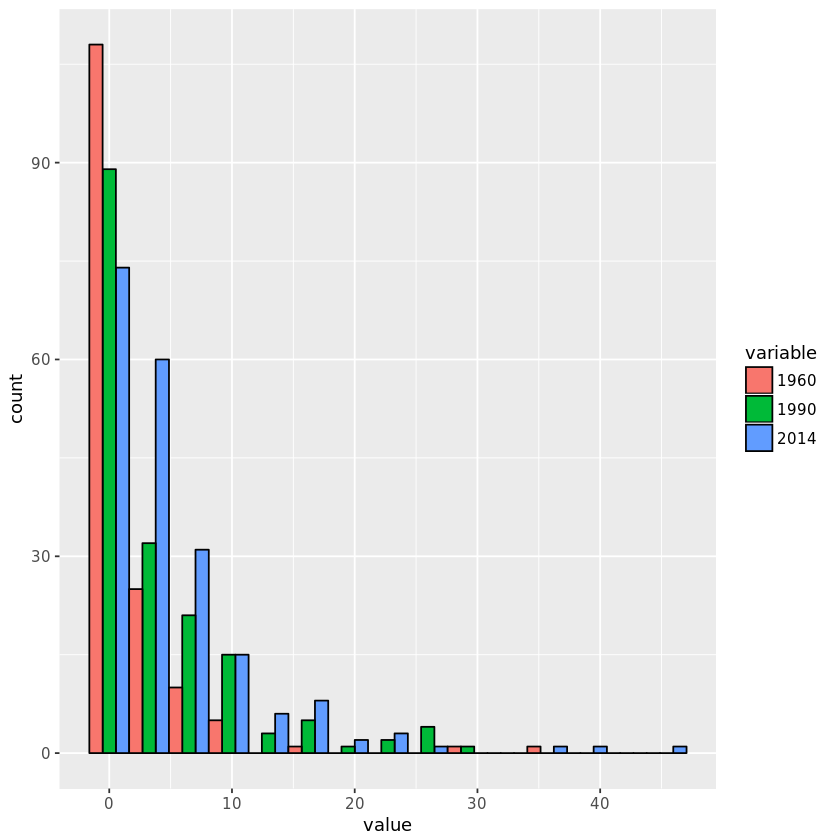

In [24]:
ggplot(data = er,aes(x=value,fill=variable))+ geom_histogram(color = "black", bins = 15, position="dodge")

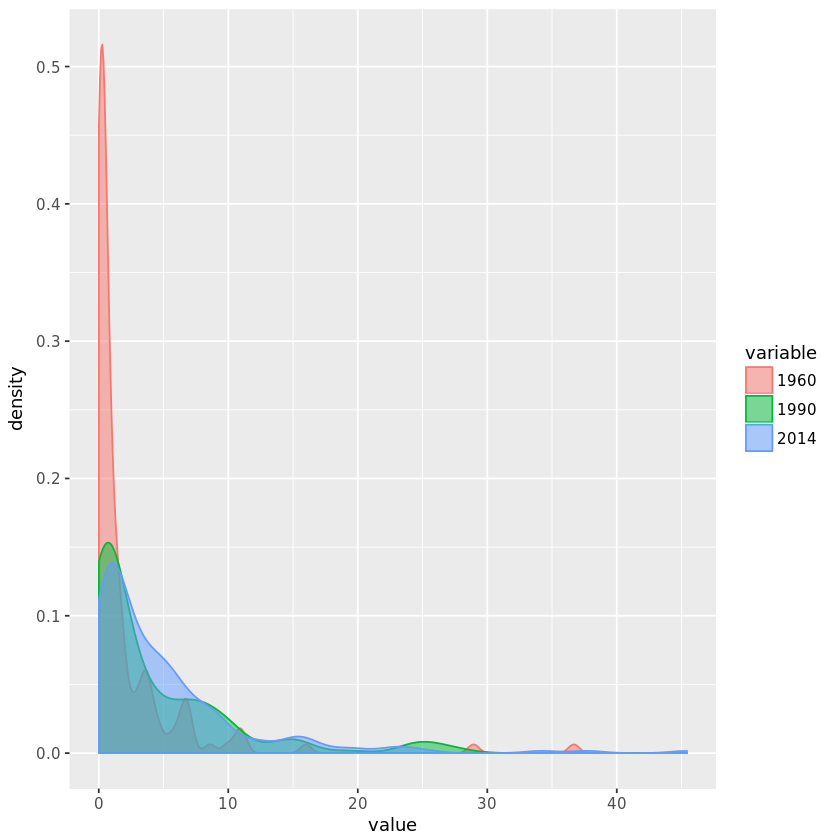

In [25]:
ggplot(er,aes(x=value))+ geom_density(aes(group=variable,colour=variable,fill=variable), alpha = 0.5)

In [26]:
head(regionData)

,Country.Code,Region,IncomeGroup,SpecialNotes,TableName,X
ARB,ARB,,,Arab World aggregate. Arab World is composed of members of the League of Arab States.,Arab World,NA
CEB,CEB,,,Central Europe and the Baltics aggregate.,Central Europe and the Baltics,NA
CSS,CSS,,,Caribbean small states aggregate.,Caribbean small states,NA
EAP,EAP,,,East Asia and Pacific regional aggregate (does not include high-income economies).,East Asia & Pacific (excluding high income),NA
EAR,EAR,,,Early-dividend countries are mostly lower-middle-income countries further along the fertility transition. Fertility rates have fallen below four births per woman and the working-age share of the population is likely rising considerably.,Early-demographic dividend,NA
EAS,EAS,,,East Asia and Pacific regional aggregate (includes all income levels).,East Asia & Pacific,NA


Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [27]:
databank[,63]<-NULL
emisiónCO2_regiones<- databank %>%  filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>% filter(Country.Code =='WLD' | Country.Code =='EUU' | Country.Code =='SSA' | Country.Code =='NAC' | Country.Code =='TEA') 


er <- melt(emisiónCO2_regiones,id=c("Country.Name", "Country.Code","Indicator.Name","Indicator.Code"),na.rm=TRUE)
er[,'value']<-er[,'value']

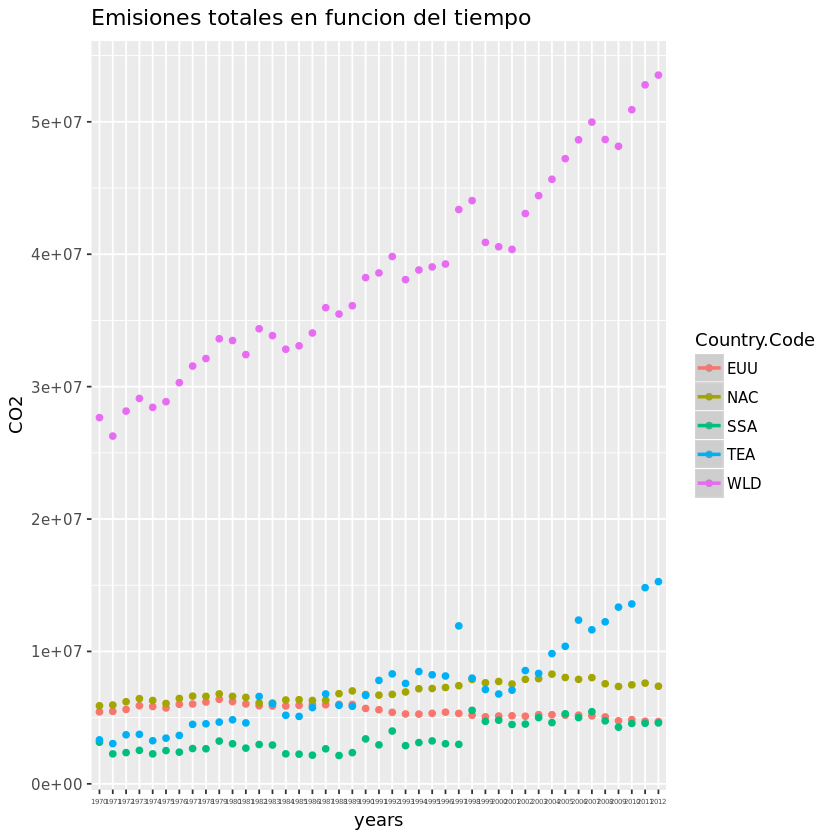

In [30]:
ggplot(er,aes(x=variable, y=value, color=Country.Code))+geom_point()+geom_smooth(method="lm")+theme(axis.text.x = element_text(size=4)) + labs(title = "Emisiones totales en funcion del tiempo", x= "years", y="CO2")

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

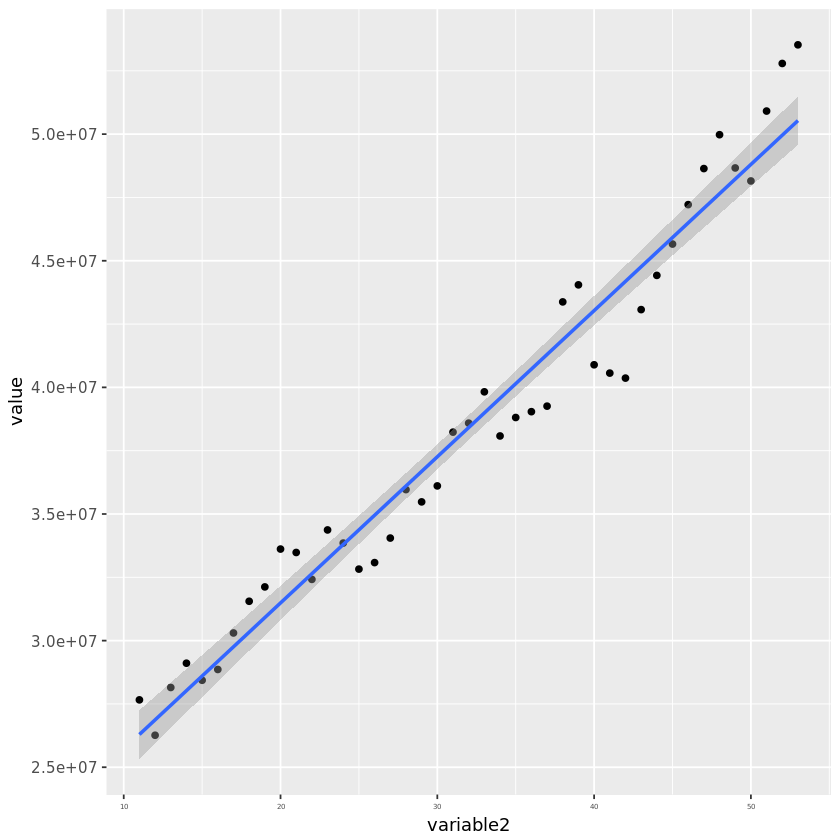

In [31]:
#filtramos la región world y realizamos una regresión lineal
world <- databank %>%  filter(Indicator.Code == "EN.ATM.GHGT.KT.CE") %>% filter(Country.Code =='WLD')
er_world <- melt(world,id=c("Country.Name", "Country.Code","Indicator.Name","Indicator.Code"),na.rm=TRUE)
er_world[,'value']<-er_world[,'value']

er_world$variable2<-as.numeric(er_world$variable)
lm5 <- lm(data = er_world, formula =  value ~ variable2)


#dibujamos la regresión lineal
ggplot(er_world,aes(x=variable2,y=value))+geom_point()+geom_smooth(method='lm',fullrange=TRUE)+theme(axis.text.x = element_text(size=4))


In [32]:
#seleccionamos lo que nos interesa del df
world2 <- er_world %>% filter(Country.Code == "WLD")
world_df<-data.frame(year=as.numeric(1970:2012), CO2=world2$value)

In [33]:
#calculamos las regresiones polinomicas
modelPoly1<-lm(CO2~year, data=world_df)
summary(modelPoly1)
modelPoly3<-lm(CO2~poly(year,3), data=world_df)
summary(modelPoly3)
modelPoly10<-lm(CO2~poly(year,10), data=world_df)
summary(modelPoly10)


Call:
lm(formula = CO2 ~ year, data = world_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-3819986 -1269567    55807  1215199  2991690 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.111e+09  3.883e+07  -28.60   <2e-16 ***
year         5.772e+05  1.950e+04   29.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1587000 on 41 degrees of freedom
Multiple R-squared:  0.9553,	Adjusted R-squared:  0.9542 
F-statistic: 875.7 on 1 and 41 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2 ~ poly(year, 3), data = world_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2863263  -853699  -146184   909560  2778744 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    38413883     194970 197.024  < 2e-16 ***
poly(year, 3)1 46968215    1278505  36.737  < 2e-16 ***
poly(year, 3)2  5159780    1278505   4.036 0.000246 ***
poly(year, 3)3  3593444    1278505   2.811 0.007694 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1279000 on 39 degrees of freedom
Multiple R-squared:  0.9724,	Adjusted R-squared:  0.9703 
F-statistic: 457.9 on 3 and 39 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2 ~ poly(year, 10), data = world_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2021373  -812089  -184889   650828  3122953 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      38413883     187008 205.413  < 2e-16 ***
poly(year, 10)1  46968215    1226291  38.301  < 2e-16 ***
poly(year, 10)2   5159780    1226291   4.208 0.000195 ***
poly(year, 10)3   3593444    1226291   2.930 0.006200 ** 
poly(year, 10)4    176599    1226291   0.144 0.886395    
poly(year, 10)5     96549    1226291   0.079 0.937735    
poly(year, 10)6   -136531    1226291  -0.111 0.912045    
poly(year, 10)7  -1839002    1226291  -1.500 0.143508    
poly(year, 10)8   2514167    1226291   2.050 0.048610 *  
poly(year, 10)9   2350331    1226291   1.917 0.064254 .  
poly(year, 10)10  -583925    1226291  -0.476 0.637187    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1226000 on 32 degrees of freedom


In [34]:
#aplicamos la funcion predict para polinomios de grado 1,3 y 10
year <- data.frame(year = as.numeric(2013:2021), stringsAsFactors=F)

year$predictx  <- predict(modelPoly1, year)
year$predictx3 <- predict(modelPoly3, year)
year$predictx10 <- predict(modelPoly10, year)

In [35]:
#modificamos el df para poder dibujar en ggplot2 el gráfico actual más la prediccion
world_df_completo <- full_join(world_df, year, by = "year", copy = TRUE)
world_df_completo <- melt(world_df_completo, id <- c("year") , na.rm = TRUE)

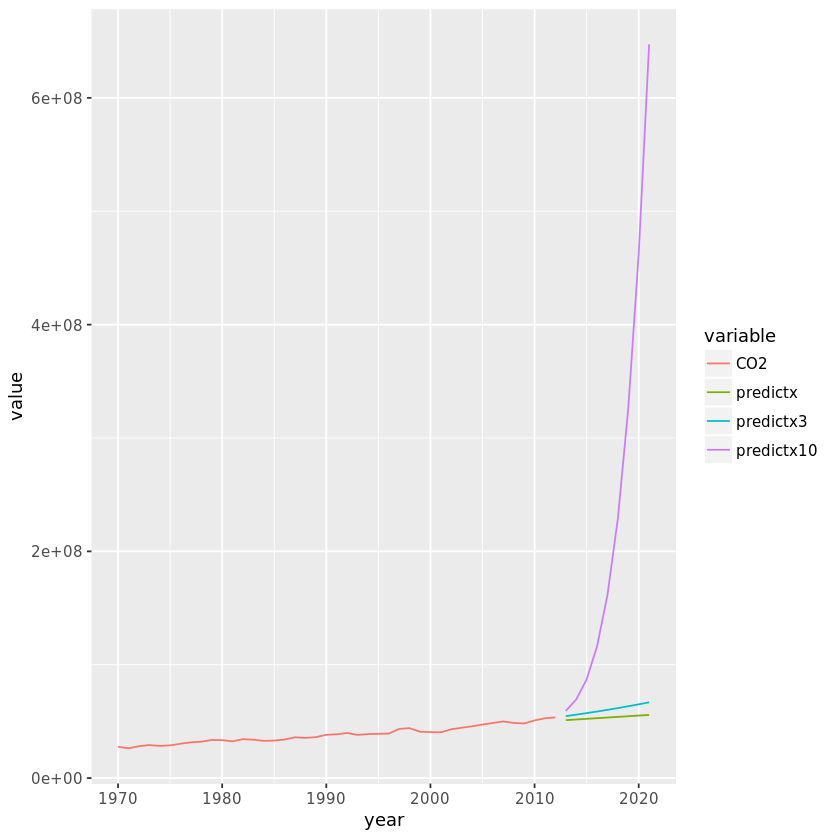

In [36]:
ggplot(world_df_completo,aes(x=year,y=value,color=variable))+geom_line()

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [37]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [38]:
world_definitivo <- databank %>%  filter(Indicator.Code == "EN.ATM.CO2E.KT") %>% filter(Country.Code =='WLD')


In [39]:
#agrupamos el df por años para poder cruzar con los otros df
agrupado_year <- co2ppm %>% group_by(year) %>% summarize (mean(interpolated))

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [40]:
er <- melt(world_definitivo,id=c("Country.Name", "Country.Code","Indicator.Name","Indicator.Code"),na.rm=TRUE)
er[,'value']<-er[,'value']

In [41]:
#adaptamos el df de emisiones anterios
colnames (agrupado_year) <- c('year','CO2_emitido')
emisionesCO2 <- er %>% select(year = variable, CO2 = value)

In [42]:
er$year <- as.numeric(1960:2014)

In [43]:
agrupado_year$year <- as.numeric(1958:2017)

In [44]:
#juntamos el df 1 y el 2
df.correlacion1 <- merge (agrupado_year, er, by = 'year', ALL = T)

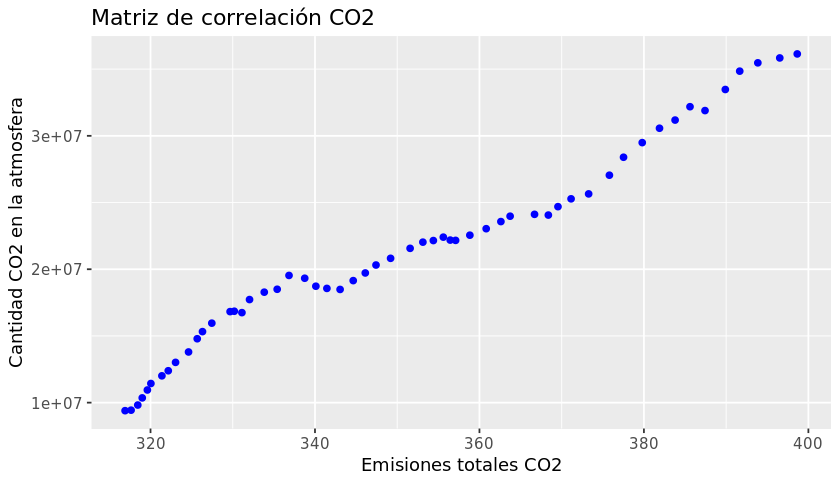

In [49]:
options(repr.plot.height = 4, repr.plot.width = 7)
ggplot(data=df.correlacion1, aes(x=CO2_emitido, y = value)) + geom_point(color = "blue") + labs(title= "Matriz de correlación CO2", x = "Emisiones totales CO2", y= "Cantidad CO2 en la atmosfera")
options(repr.plot.height = 7, repr.plot.width = 7)

In [50]:
weatherPraga_reducido <- weatherPraga %>% select (year=DATE,tmin=EMNT)

In [51]:
weatherPraga_reducido$year <- as.numeric(1775:2004)

In [52]:
#juntamos la unión de los dfs anteriores con el 3
df.correlacion2 <- merge (df.correlacion1, weatherPraga_reducido, by='year', ALL = T)

In [53]:
df.correlacion2 <- df.correlacion2  %>% select ('year','CO2_emitido','value','tmin')


In [54]:
cor(df.correlacion2$CO2_emitido,df.correlacion2$value)

[1] 0.9703198

La correlación que existe entre el CO2 emitidos y las cantidades de CO2 en la atmosfera es muy alta: 0.98

In [55]:
#obtenemos la matriz de correlación
cor(df.correlacion2[2:ncol(df.correlacion2)], use="complete.obs")

,CO2_emitido,value,tmin
CO2_emitido,1.0000000,0.9703198,0.1783153
value,0.9703198,1.0000000,0.2254552
tmin,0.1783153,0.2254552,1.0000000


#### Conclusiones

En la matriz de correlación se puede apreciar que sí que existe una correlación alta entre el CO2 en la atmósfera y el emitido, y sin embargo no existe correlación con la temperatura mínima en Praga 